In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import zipfile
import PIL
import os

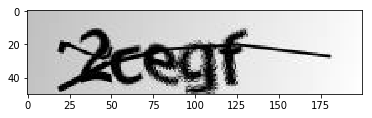

In [37]:
img = cv2.imread('2cegf.png', 0)
plt.imshow(img, 'gray')

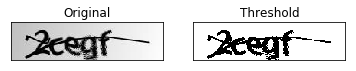

In [38]:
# Otsu thresholding
ret2, th2 = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

titles = ['Original','Otsu']
images = [img, th2]
for i in range(2):
    plt.subplot(2, 2, i + 1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.title('Threshold')
plt.show()

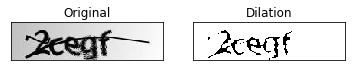

In [39]:
# Dilation
kernel = np.ones((3,3), np.uint8)
dilation2 = cv2.dilate(th2, kernel, iterations=1)

titles2 = ['Original', "Otsu"]
images2 = [img, dilation2]

for i in range(2):
    plt.subplot(2, 2, i + 1), plt.imshow(images2[i], 'gray')
    plt.title(titles2[i])
    plt.xticks([]), plt.yticks([])
    
plt.title('Dilation')
plt.show()

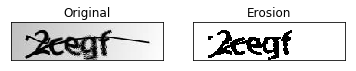

In [40]:
# Erosion
erosion2 = cv2.erode(dilation2, kernel, iterations=1)

titles3 = ['Original',"Otsu"]
images3 = [img, erosion2]

for i in range(2):
    plt.subplot(2, 2, i + 1), plt.imshow(images3[i], 'gray')
    plt.title(titles3[i])
    plt.xticks([]), plt.yticks([])
    
plt.title('Erosion')
plt.show()

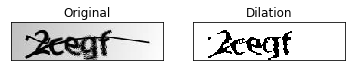

In [41]:
kernel = np.ones((3,1), np.uint8)
dilation2 = cv2.dilate(erosion2, kernel, iterations=1)

titles4 = ['Original', "Otsu"]
images4 = [img, dilation2]

for i in range(2):
    plt.subplot(2, 2, i + 1), plt.imshow(images4[i], 'gray')
    plt.title(titles4[i])
    plt.xticks([]), plt.yticks([])

plt.title('Dilation')
plt.show()

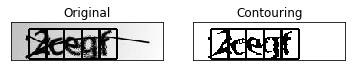

In [42]:
x, y, w, h = 23, 10, 23, 38
for  i in range(5):
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
    cv2.rectangle(dilation2, (x, y), (x + w, y + h), (0, 255, 0), 2)
    x += w

titles3 = ['Original', "Otsu"]
images3 = [img, dilation2]

for i in range(2):
    plt.subplot(2, 2, i + 1), plt.imshow(images3[i], 'gray')
    plt.title(titles3[i])
    plt.xticks([]), plt.yticks([])

plt.title('Contouring')
plt.show()

In [43]:
from PIL import Image

In [44]:
image = PIL.Image.fromarray(dilation2)
image.save('segmented.png')

In [45]:
imageobject = Image.open('segmented.png')
imageobject.show()

In [46]:
x, y, w, h = 23, 10, 23, 38
for  i in range(5):
    crop1 = imageobject.crop((x, y, x + w, y + h))
    crop1.show()
    crop1.save('{}.png'.format(i))
    x += w

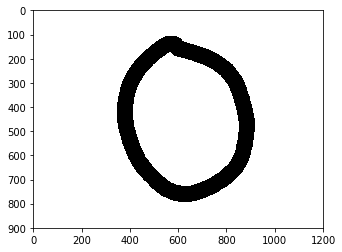

In [47]:
DATADIR = "./TrainImg/"
CATEGORIES= ["0","1","2","3","4","5","6","7","8","9","a","b","c","d","e","f","g","h","i","j","k","l","m","n","o","p","q","r","s","t","u","v","w","x","y","z"]
for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        break
    break

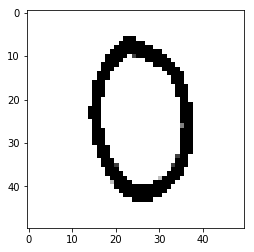

In [48]:
IMG_SIZE = 50

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap= 'gray')
plt.show()

In [49]:
train_data = []

def create_train_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category) 
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                train_data.append([new_array,class_num])
            except Exception as e:
                pass
            
create_train_data()

In [50]:
print(len(train_data))

1980


In [51]:
import random

random.shuffle(train_data)

In [52]:
for sample in train_data[:10]:
    print(sample[1])

10
22
4
12
5
11
34
4
28
6


In [53]:
X=[]
y=[]

for features, label in train_data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [54]:
import pickle

pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()
pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [55]:
pickle_in= open("X.pickle", "rb")
X = pickle.load(pickle_in)
X.shape[1:]

(50, 50, 1)

In [56]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout,Activation, Flatten, Conv2D, MaxPooling2D

X = pickle.load(open("X.pickle","rb"))
y = pickle.load(open("y.pickle","rb"))

X = X/255.0

model = Sequential()

model.add(Conv2D(64,(3,3),input_shape= X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))


model.add(Dense(36))
model.add(Activation("softmax"))

from keras.utils import to_categorical
y_binary = to_categorical(y)

model.compile(loss="categorical_crossentropy",
             optimizer="adam",
             metrics=['accuracy'])

model.fit(X,y_binary,batch_size=10, epochs=10, validation_split = 0.2)


Train on 1584 samples, validate on 396 samples
Epoch 1/10
1584/1584 [==============================] - 10s 6ms/step - loss: 3.5662 - acc: 0.0379 - val_loss: 3.4592 - val_acc: 0.0783
Epoch 2/10
1584/1584 [==============================] - 9s 6ms/step - loss: 2.9450 - acc: 0.1926 - val_loss: 2.6129 - val_acc: 0.3056
Epoch 3/10
1584/1584 [==============================] - 10s 7ms/step - loss: 1.8966 - acc: 0.4684 - val_loss: 1.9249 - val_acc: 0.4646
Epoch 4/10
1584/1584 [==============================] - 10s 6ms/step - loss: 1.2158 - acc: 0.6319 - val_loss: 1.4350 - val_acc: 0.5884
Epoch 5/10
1584/1584 [==============================] - 9s 6ms/step - loss: 0.7915 - acc: 0.7538 - val_loss: 1.3366 - val_acc: 0.6263
Epoch 6/10
1584/1584 [==============================] - 9s 6ms/step - loss: 0.5132 - acc: 0.8396 - val_loss: 1.3539 - val_acc: 0.6288
Epoch 7/10
1584/1584 [==============================] - 10s 6ms/step - loss: 0.3797 - acc: 0.8788 - val_loss: 1.4102 - val_acc: 0.6566
Epoch 8/10


In [57]:
def prepare(filepath):
    IMG_SIZE = 50
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE,IMG_SIZE,1)


#model = tf.keras.models.load_model('captcha_alpha.model')
prediction = model.predict([prepare('0.png')])
#plt.imshow(new_array)

print(len(prediction[0]))
print(prediction[0])
print(CATEGORIES[np.argmax(prediction[0])])

36
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
5


In [58]:
def prepare(filepath):
    IMG_SIZE = 50
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE,IMG_SIZE,1)


#model = tf.keras.models.load_model('captcha_alpha.model')
prediction = model.predict([prepare('1.png')])
#plt.imshow(new_array)

print(len(prediction[0]))
print(prediction[0])
print(CATEGORIES[np.argmax(prediction[0])])

36
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
e


In [59]:
def prepare(filepath):
    IMG_SIZE = 50
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE,IMG_SIZE,1)


#model = tf.keras.models.load_model('captcha_alpha.model')
prediction = model.predict([prepare('2.png')])
#plt.imshow(new_array)

print(len(prediction[0]))
print(prediction[0])
print(CATEGORIES[np.argmax(prediction[0])])

36
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
z


In [60]:
def prepare(filepath):
    IMG_SIZE = 50
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE,IMG_SIZE,1)


#model = tf.keras.models.load_model('captcha_alpha.model')
prediction = model.predict([prepare('3.png')])
#plt.imshow(new_array)

print(len(prediction[0]))
print(prediction[0])
print(CATEGORIES[np.argmax(prediction[0])])

36
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
7


In [61]:
def prepare(filepath):
    IMG_SIZE = 50
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE,IMG_SIZE,1)


#model = tf.keras.models.load_model('captcha_alpha.model')
prediction = model.predict([prepare('4.png')])
#plt.imshow(new_array)

print(len(prediction[0]))
print(prediction[0])
print(CATEGORIES[np.argmax(prediction[0])])

36
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
6
